# Ifood Dataset
## Marketing Campaign 

## Gabriel Silveira

## 02/02/2021   

![alt text](https://images-na.ssl-images-amazon.com/images/I/516k62qkOIL.png)


## Problem: Using historical dataset about Marketing Campaigns to identify oportunities and patterns to improve next Campaign: more effective and efficient.

# Let's Code...

In [65]:
# importing libs
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [6]:
# load dataset
df = pd.read_csv('ml_project1_data.csv' , sep =',')

# 1. Explore the Data

## In this topic, the most important improve is discover patterns, oportunities, data correlations, calculate new values and visualize charts.

## 1.1 Adding some new informations

In [7]:
# adding columns with total spent: all important products
df['Total_Spent'] = df['MntSweetProducts'] + df['MntFishProducts'] + df['MntFruits'] + df['MntWines'] + df['MntMeatProducts'] + df['MntGoldProds']

In [8]:
# frequency customer adesion in marketing campaign 
df['Customer_Freq'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [9]:
# number of childrens
df['Child'] = df['Teenhome'] + df['Kidhome']

In [10]:
# customer age
df['Age'] = df['Year_Birth'].apply(lambda x: 2020 - x)

In [11]:
# total time of initial acess
df['Acess_Time'] = df['Dt_Customer'].apply(lambda x: 2020 - int(x[0:4]))

## 1.2 Overview the Data



In [12]:
df.shape

(2240, 34)

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Customer_Freq,Child,Age,Acess_Time
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,1617,0,0,63,8
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,27,0,2,66,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,0,0,55,7
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,53,0,1,36,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,422,0,1,39,6


In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Spent', 'Customer_Freq', 'Child', 'Age', 'Acess_Time'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent,Customer_Freq,Child,Age,Acess_Time
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.013393,0.009375,3.0,11.0,0.149107,605.798214,0.297768,0.950446,51.194196,6.971875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.114976,0.096391,0.0,0.0,0.356274,602.249288,0.678381,0.751803,11.984069,0.684554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.000000,0.000000,24.000000,6.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,68.750000,0.000000,0.000000,43.000000,7.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,396.000000,0.000000,1.000000,50.000000,7.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1045.500000,0.000000,1.000000,61.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,4.000000,3.000000,127.000000,8.000000


In [17]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Spent             0
Customer_Freq           0
Child                   0
Age                     0
Acess_Time              0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Total_Spent            0
Customer_Freq          0
Child                  0
Age                    0
Acess_Time             0
dtype: int64

## 1.3 Correlation the Data: looking for patterns 

In [20]:
# correlation between Target (Response) and others columns
mc = df.corr(method='spearman')
mc['Response'].sort_values(ascending=False)

Response               1.000000
Customer_Freq          0.387892
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
AcceptedCmp3           0.254005
Total_Spent            0.237931
NumCatalogPurchases    0.232163
MntMeatProducts        0.222244
MntWines               0.198233
MntGoldProds           0.182387
AcceptedCmp4           0.180205
NumWebPurchases        0.172107
Acess_Time             0.171283
AcceptedCmp2           0.169294
Income                 0.161100
MntFruits              0.147054
MntSweetProducts       0.135261
MntFishProducts        0.113412
NumStorePurchases      0.050577
Year_Birth             0.022534
NumWebVisitsMonth      0.012506
Complain              -0.002029
ID                    -0.021801
Age                   -0.022534
NumDealsPurchases     -0.035421
Kidhome               -0.075391
Teenhome              -0.158767
Child                 -0.174628
Recency               -0.199548
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Re

In [21]:
# correlation between discount purchases and other columns
mc['NumDealsPurchases'].sort_values(ascending=False)

NumDealsPurchases      1.000000
Child                  0.542705
Teenhome               0.480238
NumWebVisitsMonth      0.395857
NumWebPurchases        0.284461
Kidhome                0.260342
Acess_Time             0.186877
NumStorePurchases      0.096532
MntGoldProds           0.090165
Age                    0.084992
MntWines               0.053550
Complain               0.016784
Recency                0.008214
AcceptedCmp4          -0.000793
AcceptedCmp3          -0.014251
Total_Spent           -0.015500
ID                    -0.026909
MntMeatProducts       -0.033745
Response              -0.035421
NumCatalogPurchases   -0.043862
AcceptedCmp2          -0.052714
Year_Birth            -0.084992
MntSweetProducts      -0.108031
MntFruits             -0.111871
MntFishProducts       -0.123880
Customer_Freq         -0.139255
AcceptedCmp1          -0.177031
Income                -0.195533
AcceptedCmp5          -0.254731
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Nu

In [22]:
mc['Total_Spent'].sort_values(ascending=False)

Total_Spent            1.000000
MntMeatProducts        0.940218
MntWines               0.928394
NumCatalogPurchases    0.894012
Income                 0.850920
NumStorePurchases      0.806043
NumWebPurchases        0.729273
MntFishProducts        0.694671
MntGoldProds           0.691691
MntFruits              0.683442
MntSweetProducts       0.669823
AcceptedCmp5           0.384023
Customer_Freq          0.382013
AcceptedCmp1           0.321723
AcceptedCmp4           0.242485
Response               0.237931
Acess_Time             0.166921
Age                    0.158811
AcceptedCmp2           0.120865
AcceptedCmp3           0.037461
Recency                0.018856
NumDealsPurchases     -0.015500
ID                    -0.025393
Complain              -0.040446
Teenhome              -0.056405
Year_Birth            -0.158811
NumWebVisitsMonth     -0.475607
Child                 -0.484094
Kidhome               -0.615541
Z_CostContact               NaN
Z_Revenue                   NaN
Name: To

In [23]:
mc['NumWebPurchases'].sort_values(ascending=False) 

NumWebPurchases        1.000000
MntWines               0.742434
Total_Spent            0.729273
MntMeatProducts        0.683491
NumStorePurchases      0.673902
NumCatalogPurchases    0.621001
MntGoldProds           0.577533
Income                 0.573262
MntFruits              0.473336
MntFishProducts        0.466296
MntSweetProducts       0.462105
NumDealsPurchases      0.284461
Customer_Freq          0.238057
AcceptedCmp1           0.184221
AcceptedCmp4           0.181649
Acess_Time             0.179282
AcceptedCmp5           0.174966
Response               0.172107
Age                    0.166134
Teenhome               0.147145
AcceptedCmp2           0.036831
AcceptedCmp3           0.032448
Recency               -0.002078
Complain              -0.022145
ID                    -0.024618
NumWebVisitsMonth     -0.096936
Year_Birth            -0.166134
Child                 -0.185707
Kidhome               -0.423273
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Nu

In [24]:
mc['NumStorePurchases'].sort_values(ascending=False)

NumStorePurchases      1.000000
Total_Spent            0.806043
MntWines               0.805352
MntMeatProducts        0.779894
Income                 0.731752
NumCatalogPurchases    0.707130
NumWebPurchases        0.673902
MntFruits              0.582166
MntSweetProducts       0.581463
MntFishProducts        0.580711
MntGoldProds           0.540362
AcceptedCmp5           0.224881
Customer_Freq          0.205244
AcceptedCmp4           0.199326
AcceptedCmp1           0.197167
Age                    0.166814
Acess_Time             0.104028
NumDealsPurchases      0.096532
AcceptedCmp2           0.083281
Teenhome               0.076381
Response               0.050577
Recency                0.003791
ID                    -0.021991
Complain              -0.027121
AcceptedCmp3          -0.084684
Year_Birth            -0.166814
Child                 -0.341168
NumWebVisitsMonth     -0.458034
Kidhome               -0.557366
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Nu

In [25]:
mc['NumCatalogPurchases'].sort_values(ascending=False)

NumCatalogPurchases    1.000000
Total_Spent            0.894012
MntMeatProducts        0.853744
MntWines               0.822926
Income                 0.791841
NumStorePurchases      0.707130
MntFishProducts        0.655878
MntGoldProds           0.649036
MntFruits              0.633081
MntSweetProducts       0.627996
NumWebPurchases        0.621001
Customer_Freq          0.362128
AcceptedCmp5           0.324455
AcceptedCmp1           0.300725
Response               0.232163
AcceptedCmp4           0.188517
Age                    0.178542
Acess_Time             0.118787
AcceptedCmp2           0.104382
AcceptedCmp3           0.103177
Recency                0.028665
ID                    -0.011334
Complain              -0.031252
NumDealsPurchases     -0.043862
Teenhome              -0.046041
Year_Birth            -0.178542
Child                 -0.463403
NumWebVisitsMonth     -0.538506
Kidhome               -0.598966
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Nu

In [26]:
mc['Child'].sort_values(ascending=False)

Child                  1.000000
Teenhome               0.697694
Kidhome                0.671380
NumDealsPurchases      0.542705
NumWebVisitsMonth      0.431430
Age                    0.084057
Complain               0.030565
Recency                0.012781
ID                    -0.000311
AcceptedCmp3          -0.015200
Acess_Time            -0.029087
AcceptedCmp2          -0.072814
Year_Birth            -0.084057
AcceptedCmp4          -0.090062
Response              -0.174628
NumWebPurchases       -0.185707
Customer_Freq         -0.239924
AcceptedCmp1          -0.246279
AcceptedCmp5          -0.304335
MntGoldProds          -0.318837
MntWines              -0.335959
NumStorePurchases     -0.341168
Income                -0.375991
NumCatalogPurchases   -0.463403
MntSweetProducts      -0.464267
MntFruits             -0.470760
Total_Spent           -0.484094
MntMeatProducts       -0.491675
MntFishProducts       -0.496558
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Ch

## 1.4 Visual Correlations

Text(0.5, 1.0, 'Data Correlation')

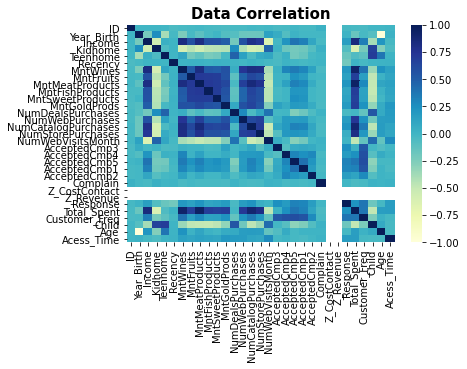

In [27]:
# data correlation in heatmap
sns.heatmap(mc,
            xticklabels = mc.columns,
            yticklabels = mc.columns , cmap = 'YlGnBu' )
plt.title('Data Correlation' , size = 15 , weight = 'bold')

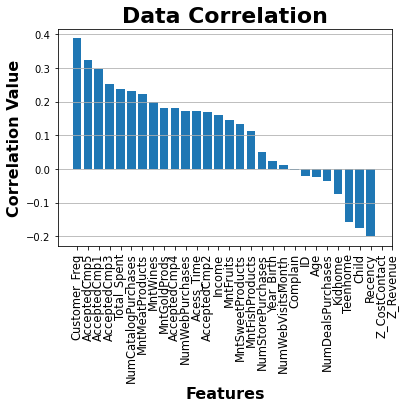

In [28]:
# plot data correlation between Response and other values to verify strong relations
matrix_corr = mc['Response'].sort_values(ascending=False)
tick_label = list(matrix_corr.index)[1:]
fig , ax   = plt.subplots()
x = range(1, len(matrix_corr))
ax.bar(x , height =matrix_corr[1:] ,
        tick_label = tick_label)
ax.set_xticklabels(rotation='vertical', fontsize=11.5 , labels = tick_label)
ax.set_title('Data Correlation' , fontsize=22 , weight = 'bold')
ax.set_xlabel('Features' , fontsize=16 , weight = 'bold')
ax.set_ylabel('Correlation Value' , fontsize=16, weight = 'bold')
ax.grid(axis = 'y')

Text(0.5, 1.0, 'Segmentation by Education')

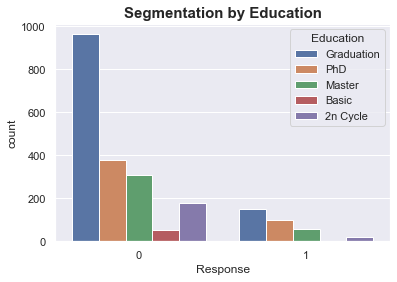

In [29]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Response',hue= 'Education', data=df)
ax.set_title('Segmentation by Education' , size = 15 , weight = 'bold')

Text(0.5, 1.0, 'Segmentation by Accepted 5°Camp')

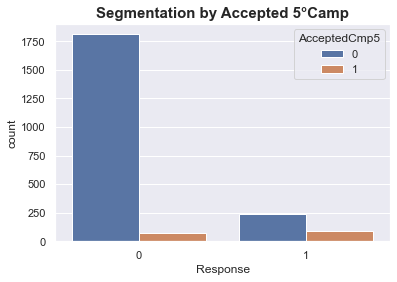

In [30]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Response',hue= 'AcceptedCmp5', data=df)
ax.set_title('Segmentation by Accepted 5°Camp' , size = 15 , weight = 'bold')

In [31]:
# plot relations between frequency at Marketing Campaign accession and income and total spent customers
import plotly.express as px
%matplotlib inline
fig = px.scatter(
    data_frame=df, 
    x='Income', 
    y='Total_Spent', 
    color='Customer_Freq',
    hover_name='Response',
    size_max=60)

fig.show()

In [32]:
resp = df[df['Response'] == 1].reset_index()
unresp = df[df['Response'] == 0].reset_index()
print('- Addepted Customer Income Mean:' ,resp['Income'].mean())
print('- Not Addepted Customer Income Mean:' ,unresp['Income'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Child Mean:' ,resp['Child'].mean())
print('- Not Addepted Customer Child Mean:' ,unresp['Child'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Spent Mean:' ,resp['Total_Spent'].mean())
print('- Not Addepted Customer Spent Mean:' ,unresp['Total_Spent'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Recurrency Mean:' ,resp['Customer_Freq'].mean())
print('- Not Addepted Customer Recurrency Mean:' ,unresp['Customer_Freq'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Web Visits Mean:' ,resp['NumWebVisitsMonth'].mean())
print('- Not Addepted Customer Web Visits Mean:' ,unresp['NumWebVisitsMonth'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Deal Purchases Mean:' ,resp['NumDealsPurchases'].mean())
print('- Not Addepted Customer Deal Purchases Mean:' ,unresp['NumDealsPurchases'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Recency Mean:' ,resp['Recency'].mean())
print('- Not Addepted Customer Recency Mean:' ,unresp['Recency'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Web Purchases Mean:' ,resp['NumWebPurchases'].mean())
print('- Not Addepted Customer Web Purchases Mean:' ,unresp['NumWebPurchases'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Wine Purchases Mean:' ,resp['MntWines'].mean())
print('- Not Addepted Customer Wine Purchases Mean:' ,unresp['MntWines'].mean())
print('----------------------------------------------------------------')
print('- Addepted Customer Age Mean:' ,resp['Age'].mean())
print('- Not Addepted Customer Age Mean:' ,unresp['Age'].mean())

- Addepted Customer Income Mean: 60209.67567567567
- Not Addepted Customer Income Mean: 50839.13276686139
----------------------------------------------------------------
- Addepted Customer Child Mean: 0.6486486486486487
- Not Addepted Customer Child Mean: 1.0
----------------------------------------------------------------
- Addepted Customer Spent Mean: 985.6606606606607
- Not Addepted Customer Spent Mean: 540.1242697822623
----------------------------------------------------------------
- Addepted Customer Recurrency Mean: 0.987987987987988
- Not Addepted Customer Recurrency Mean: 0.17631439192777482
----------------------------------------------------------------
- Addepted Customer Web Visits Mean: 5.306306306306307
- Not Addepted Customer Web Visits Mean: 5.32129580456718
----------------------------------------------------------------
- Addepted Customer Deal Purchases Mean: 2.339339339339339
- Not Addepted Customer Deal Purchases Mean: 2.3207647371216145
----------------------

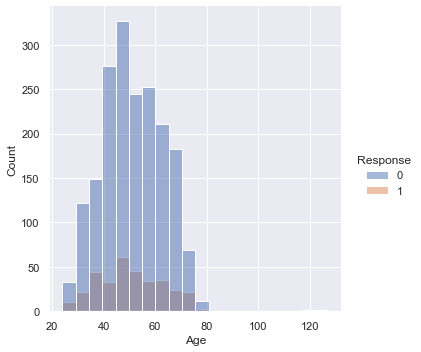

In [33]:
ax = sns.displot(data = df, x='Age', hue='Response' , bins = 20)

Text(0.5, 1.0, 'Segmentation by Marital Status')

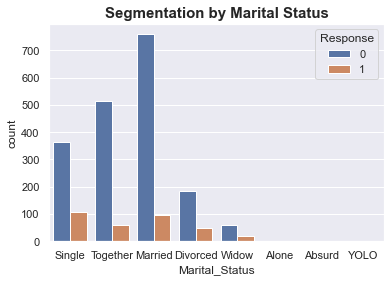

In [34]:
ax = sns.countplot(data = df, x='Marital_Status', hue='Response')
ax.set_title('Segmentation by Marital Status' , size =15 , weight = 'bold')

Text(0.5, 1.0, 'Segmentation by Children Number')

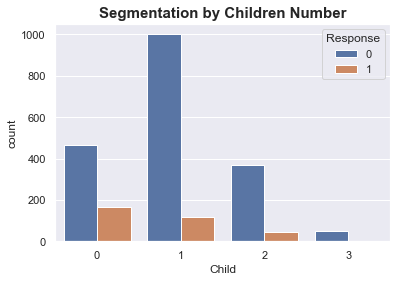

In [35]:
ax = sns.countplot(data = df, x='Child', hue='Response')
ax.set_title('Segmentation by Children Number' , size =15 , weight = 'bold')

Text(0.5, 1.0, 'Segmentation by Acess Time')

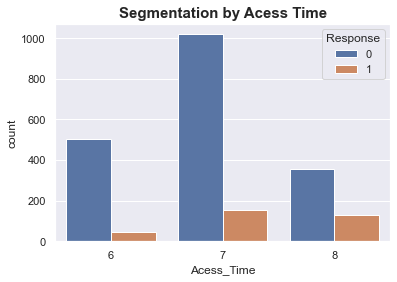

In [36]:
ax = sns.countplot(data = df, x='Acess_Time', hue='Response')
ax.set_title('Segmentation by Acess Time' , size =15 , weight = 'bold')

<AxesSubplot:xlabel='Customer_Freq', ylabel='Total_Spent'>

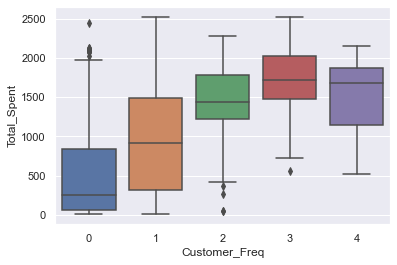

In [37]:
sns.boxplot(x='Customer_Freq', y='Total_Spent', data=df)

Text(0.5, 1.0, 'Segmentation by Marital_Status')

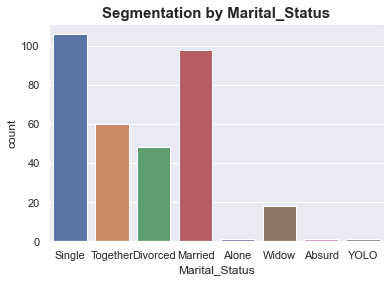

In [38]:
ax= sns.countplot(data = resp , x='Marital_Status')
ax.set_title('Segmentation by Marital_Status' , size =15 , weight = 'bold')

In [39]:
print('Percentage of single in addepted persons:',round(len(resp[resp['Marital_Status'] == 'Single']) / len(resp['Marital_Status'])*100,2),'%')
print('Percentage of married in addepted persons:',round(len(resp[(resp['Marital_Status'] == 'Married') | (resp['Marital_Status'] == 'Together')]) / len(resp['Marital_Status'])*100,2),'%')

Percentage of single in addepted persons: 31.83 %
Percentage of married in addepted persons: 47.45 %


Text(0.5, 1.0, 'Segmentation by Marital_Status')

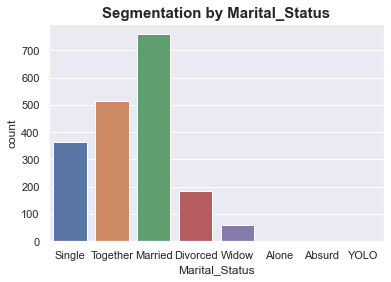

In [40]:
ax=sns.countplot(data = unresp , x='Marital_Status')
ax.set_title('Segmentation by Marital_Status' , size =15 , weight = 'bold')

In [41]:
print('Percentage of single in not addepted persons:',round(len(unresp[unresp['Marital_Status'] == 'Single']) / len(unresp['Marital_Status'])*100,2),'%')
print('Percentage of married in addepted persons:',round(len(unresp[(unresp['Marital_Status'] == 'Married') | (unresp['Marital_Status'] == 'Together')]) / len(unresp['Marital_Status'])*100,2),'%')

Percentage of single in not addepted persons: 19.38 %
Percentage of married in addepted persons: 67.55 %


Text(0.5, 1.0, 'Segmentation by Education')

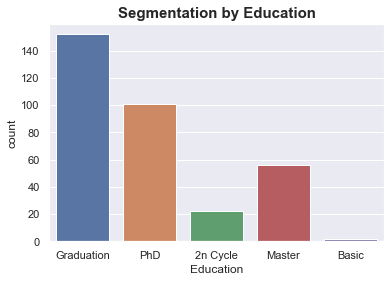

In [43]:
ax=sns.countplot(data = resp , x='Education')
ax.set_title('Segmentation by Education' , size =15 , weight = 'bold')

In [50]:
print('Percentage of Basic Education:',round(len(resp[resp['Education'] == 'Basic']) / len(resp['Education'])*100,2),'%')

Percentage of Basic Education: 0.6 %


Text(0.5, 1.0, 'Segmentation by Education')

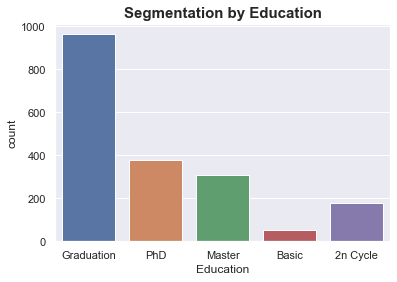

In [46]:
ax=sns.countplot(data = unresp , x='Education')
ax.set_title('Segmentation by Education' , size =15 , weight = 'bold')

In [48]:
print('Percentage of Graduation Education:',round(len(unresp[unresp['Education'] == 'Graduation']) / len(unresp['Education'])*100,2),'%')

Percentage of Graduation Education: 51.19 %


Text(0.5, 1.0, 'Complain in 2 years')

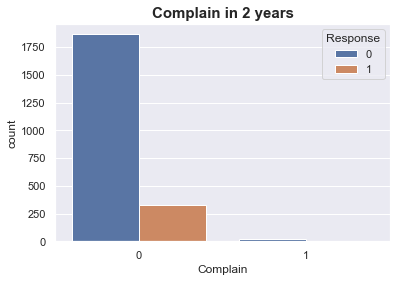

In [52]:
ax = sns.countplot(data = df, x = 'Complain' , hue='Response')
ax.set_title('Complain in 2 years' , size =15 , weight = 'bold')

Text(0.5, 1.0, 'Total Spent by Education')

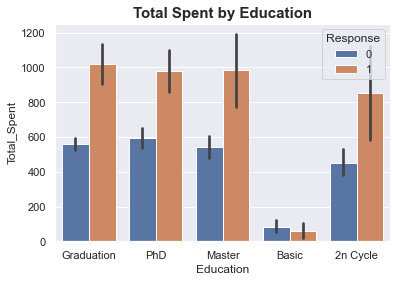

In [67]:
ax = sns.barplot(data = df, x = 'Education' , y='Total_Spent',
estimator=mean , hue = 'Response')
ax.set_title('Total Spent by Education' , size =15 , weight = 'bold')

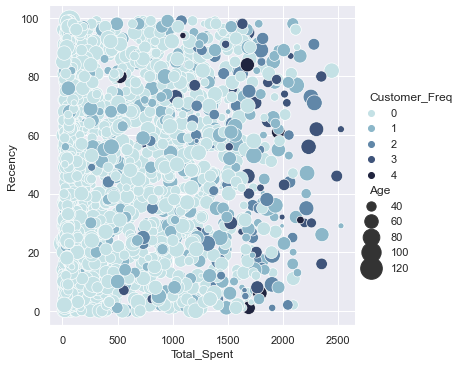

In [71]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x='Total_Spent', y='Recency',
    hue='Customer_Freq', size='Age',
    palette=cmap, sizes=(10, 500))

# It's Insight Time...

![alt text](https://canaldemarketingdigital.com.br/wp-content/uploads/2019/04/Insight-o-que-e-1024x682.jpg)

# Most Important Insights...
- Clientes que aderiram a oferta tem salário 18% maior do que os que não aceitaram;
- Clientes que aderiram a oferta gastam 83% a mais que os que não aderiram;
- Em média, clientes que aderiram e que não aderiram tem a mesma quantidade de visitas no web site;
- Clientes que tem maior frequencia de adesão nas campanhas de marketing tendem a ter um salário mais elevado;
- Quão maior o número de filhos menor a probabilidade de aderir a oferta;
- Tanto as pessoas que aderiram como as que não aderiram tem média de idade por volta de 50 anos;
- 30% das pessoas que aderiram a oferta são solteiras;
- 67% das pessoas que não aderiram a oferta são casadas ou estão juntas com alguém;
- Em média, nos ultimos 2 anos os clientes que aderiram a oferta gastaram 86% a mais que os que não aderiram;
- Pessoas que aderiram a oferta de marketing apenas 0,6% tem escolaridade Básica;
- Pessoas com phd somadas gastaram mais;
- Em média, pessoa com graduação gastam mais;
- Pessoas que tem filhos utilizam mais descontos nas compras do que as que não tem filhos;

# 2. Customer Segmentation